In [5]:
from google.colab import files
uploaded=files.upload()

Saving ufc_fighters.csv to ufc_fighters.csv


In [6]:
import pandas as pd
import io
ufc_data=pd.read_csv(io.BytesIO(uploaded["ufc_fighters.csv"]))

In [7]:
ufc_data.head()

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,9/29/1994,2.05,60,2.73,42,10.23,100,0,20.4
1,Will Kerr,9,3,0,177.80,70.31,175.26,Orthodox,10/21/1982,1.91,42,6.22,33,0.00,0,0,14.3
2,Bo Nickal,5,0,0,185.42,83.91,193.04,Southpaw,1/14/1996,2.76,62,0.55,75,11.04,50,0,13.8
3,Westin Wilson,16,8,0,185.42,65.77,185.42,Southpaw,1/24/1989,1.38,50,7.59,26,0.00,0,0,10.3
4,Dione Barbosa,6,2,0,167.64,56.70,167.64,Orthodox,5/8/1992,0.87,50,0.65,66,3.27,100,0,9.8


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(style="whitegrid")

<ipython-input-10-da87b4f17188>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="significant_strikes_landed_per_minute",y="significant_striking_accuracy",data=ufc_data,ax=axes[1,1],palette="viridis")


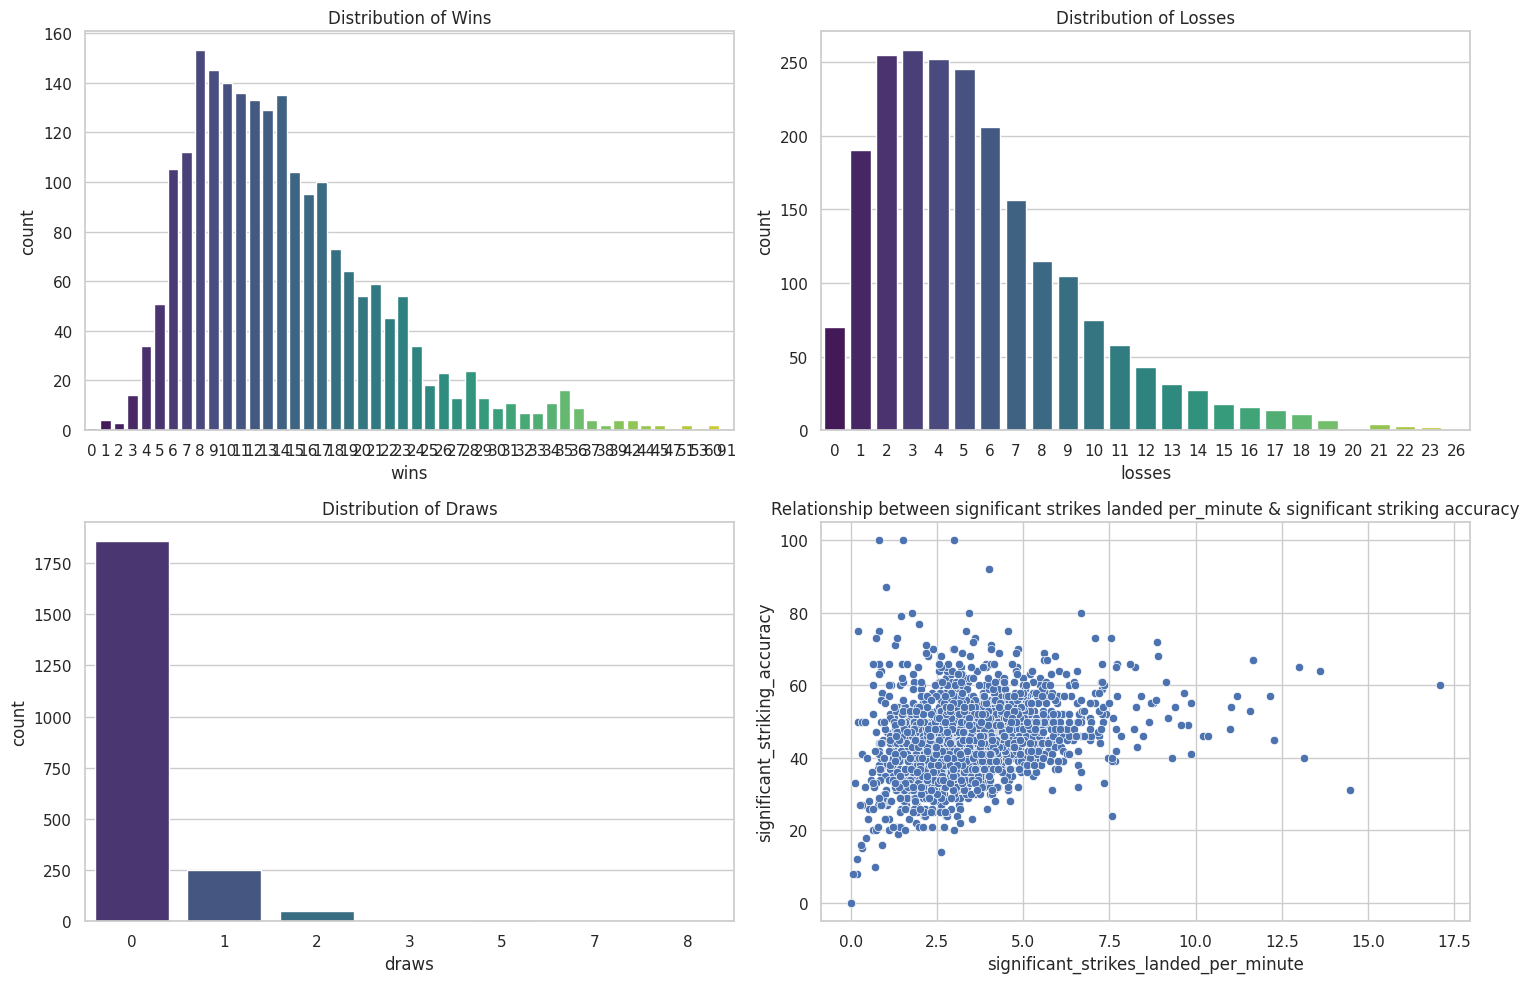

In [10]:
fig, axes=plt.subplots(nrows=2,ncols=2,figsize=(15,10))

#Distributions of wins, losses & draws
sns.countplot(x="wins",data=ufc_data,ax=axes[0,0],palette="viridis")
axes[0,0].set_title("Distribution of Wins")

sns.countplot(x="losses",data=ufc_data,ax=axes[0,1],palette="viridis")
axes[0,1].set_title("Distribution of Losses")

sns.countplot(x="draws",data=ufc_data,ax=axes[1,0],palette="viridis")
axes[1,0].set_title("Distribution of Draws")

sns.scatterplot(x="significant_strikes_landed_per_minute",y="significant_striking_accuracy",data=ufc_data,ax=axes[1,1],palette="viridis")
axes[1,1].set_title("Relationship between significant strikes landed per_minute & significant striking accuracy")

#plotting the graph
plt.tight_layout()
plt.show()

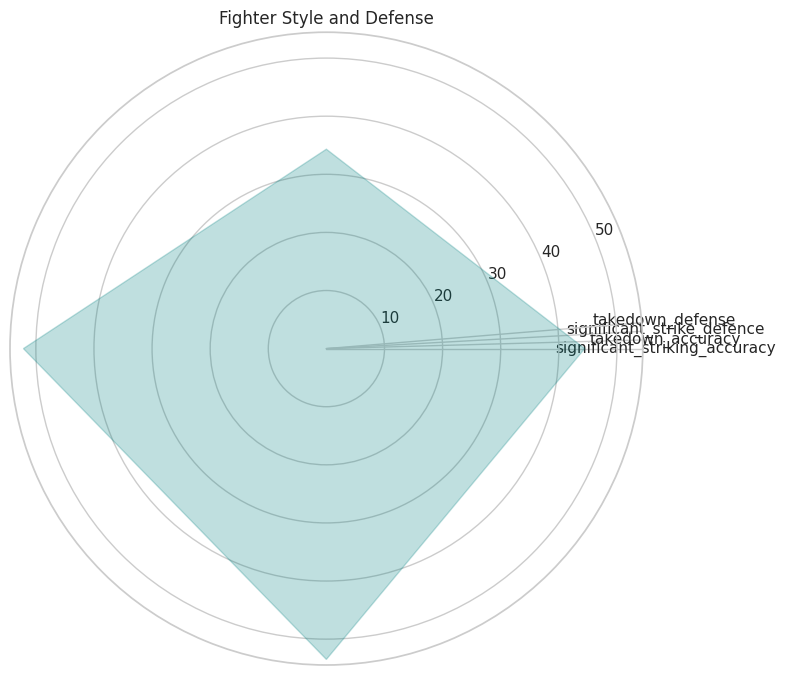

In [11]:
#Creating a Radar chart for Fighter Style and Defence

import math
from math import pi

#Selecting relavent columns
fighter_style_data=ufc_data[['significant_striking_accuracy','takedown_accuracy','significant_strike_defence','takedown_defense']]

mean_values=fighter_style_data.mean()

no_of_attributes=len(mean_values)

#Creating angles for each attribute

angles=[n/float(no_of_attributes)*2*pi for n in range(no_of_attributes)]
angles+=angles[:1]

angles = angles[:-1]

#Creating subplots with polar projection
fig, ax=plt.subplots(figsize=(8,8),subplot_kw=dict(polar=True))

#Plotting the Radar Chart
ax.fill(angles,mean_values,color="teal",alpha=0.25)
ax.set_thetagrids(angles,fighter_style_data.columns)
ax.set_title('Fighter Style and Defense')

plt.tight_layout()
plt.show()

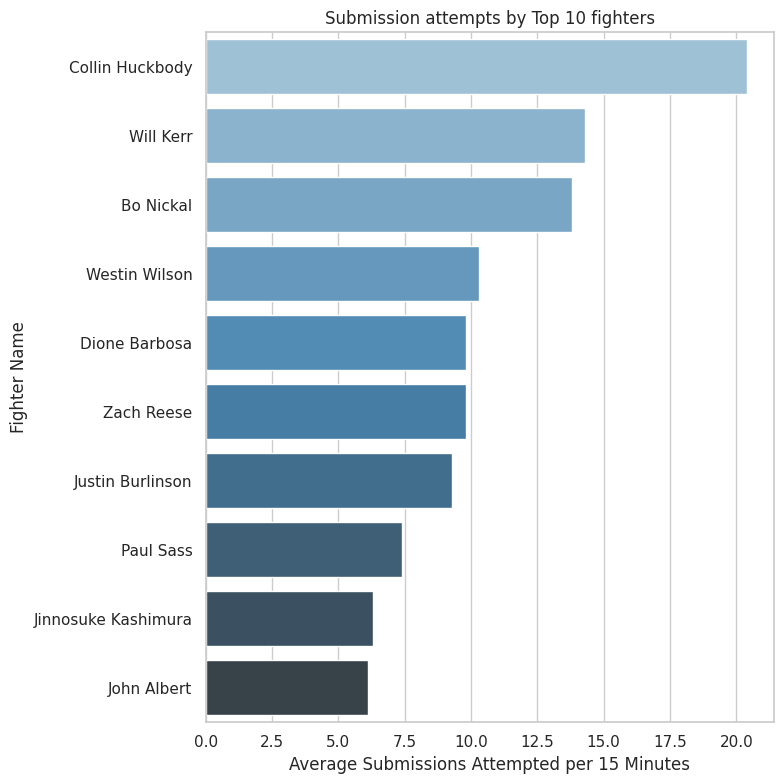

In [16]:
#Submission attempts by Top 10 fighters

plt.figure(figsize=(8,8),)
sns.barplot(x='average_submissions_attempted_per_15_minutes', y='name', data=ufc_data.sort_values(by='average_submissions_attempted_per_15_minutes', ascending=False).head(10), palette="Blues_d")
plt.title("Submission attempts by Top 10 fighters")
plt.xlabel('Average Submissions Attempted per 15 Minutes')
plt.ylabel("Fighter Name")

plt.tight_layout()

plt.show()

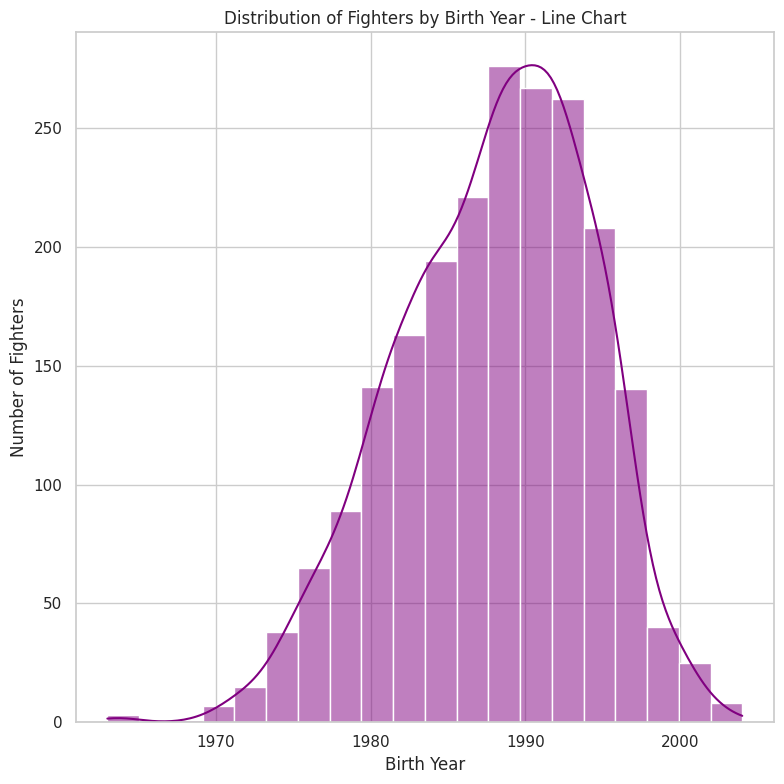

In [18]:
#Temporal Analysis (Distribution of Fighters by Birth Year - Line Chart)

ufc_data["date_of_birth"]=pd.to_datetime(ufc_data["date_of_birth"])

ufc_data["birth_year"]=ufc_data["date_of_birth"].dt.year

plt.figure(figsize=(8,8))
sns.histplot(ufc_data["birth_year"],bins=20,kde=True,color="purple")
plt.title("Distribution of Fighters by Birth Year - Line Chart")
plt.xlabel("Birth Year")
plt.ylabel("Number of Fighters")

plt.tight_layout()

plt.show()